<a href="https://colab.research.google.com/github/Gunseerat/Gunseerat/blob/main/Unsupervised_Learning_suing_K_means_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loading

In [ ]:
import numpy as np 
import pandas as pd 
from google.colab import files
uploaded = files.upload()

displaying head / first 5 observations of dataframe

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Live_20210128.csv']))
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Displaying concise summary using info() and stating two inferences
Answer: There are 16 columns with 4 different data types and 4 columns without any proper headers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

Performing exploratory data analysis to locate any missing values
Answer: 4 columns have missing/ null values

In [ ]:
df.isnull()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
7046,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
7047,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
7048,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True


find unique values in status_type

In [ ]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Converting categorical values to numeric using label encoder

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['status_type']= label_encoder.fit_transform(df['status_type']) 
df.status_type.unique()

array([3, 1, 0, 2])

Feature Scaling : Data normalization using min max method

In [ ]:
df1 = df.select_dtypes(exclude=object)

In [ ]:
df_max_scaled = df1.copy()
for column in df_max_scaled.columns:
	df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()
display(df_max_scaled)

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,0.000142,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,NaN,NaN,NaN,NaN
1,0.000284,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
2,0.000426,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,NaN,NaN,NaN,NaN
3,0.000567,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
4,0.000709,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.999433,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
7046,0.999574,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,NaN,NaN,NaN,NaN
7047,0.999716,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
7048,0.999858,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN


Using Elbow Method to find the number of clusters

In [ ]:
mms = MinMaxScaler()
mms.fit(df1)
data_transformed = mms.transform(df1)
data_transformed = np.nan_to_num(data_transformed)
print(data_transformed)

[[0.00000000e+00 1.00000000e+00 1.12314225e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.41864094e-04 3.33333333e-01 3.18471338e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.83728188e-04 1.00000000e+00 4.81953291e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99716272e-01 3.33333333e-01 4.24628450e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99858136e-01 3.33333333e-01 7.45222930e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.33333333e-01 3.60934183e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

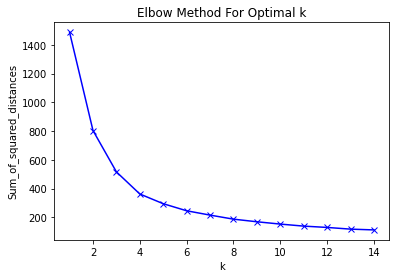

In [ ]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As the elbow forms at 4 the number of clusters can be stated to be 4 according to elbow method, that will be verified using silhouette scores

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(data_transformed)
labels = kmeans_model.labels_
metrics.silhouette_score(data_transformed, labels, metric='euclidean')

0.5380961856013775

Since the round off value is nearly 0.54, we can safely say the 4 clusters work.

In [ ]:
kmeans_model.cluster_centers_
kmeans_model.labels_[:5]

array([3, 1, 3, 1, 1], dtype=int32)

TASK #3 PCA on fruit dataset
Loading, Scaling and PCA to find two principal components

In [ ]:
df2= pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(df2)
Scaled_data=scaling.transform(df2)
principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

Feature centering with zero mean and unit variance

In [ ]:
mean = np.mean(x, axis= 0)
print("Mean ", mean)
mean_data = x - mean
var = np.std(x)
print("Standard variance", var)

Mean  [4.13981467e-17 2.25808073e-17]
Standard variance 1.3982171205027234


Analysis : PCA with 4 components print their variance ratio

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(Scaled_data)
pca.components_
pca.transform(Scaled_data)
pca.explained_variance_ratio_

array([0.46714596, 0.31485849, 0.16064024, 0.04624694])